# Unsupervised Learning Techniques

Although most of the applications of machine learning today are based on supervised learning (& as a result, this is where most of the investments go to), the vast majority of the available data is unlabeled: we have the input features $X$, but we do not have the labels $y$. The computer scientist Yann LeCun famously said that "if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, & reinforcement learning would be the cherry on the cake." In other words, there is a huge potential in unsupervised learning that we have only barely started to sink our teeth into.

Say you want to create a system that will take a few pictures of each item on a manufacturing production line & detect which items are defective. You can fairly easily create a system that will take pictures automatically, & this might give you thousands of pictures every day. you can then build a reasonably large dataset in just a few weeks. But wait, there is no labels! If you want to train a regular binary classifier that will predict whether an item is defective or not, you will need to label every single picture as 'defective" or "normal". This will generally require human experts to sit down & manually go through all the pictures. This is a long, costly, & tedious task, so it will usually only be done ona small subset of available pictures. As a result, the labeled dataset will be quite small, & the classifier's performance will be disappointing. Moreover, every time the company makes any change to its products, the whole process will need to be started over from scratch. Wouldn't it be great if the algorithm could just exploit the unlabeled data without needing humans to label every picture? Enter unsupervised learning.

In this lesson, we will look at a few unsupervised learning tasks & algorithms:

* *Clustering*
   - The goal is to group similar instance together into *clusters*. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, & more.
* *Anomaly detection*
   - The objective is to learn what "normal" data looks like, & then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.
* *Density estimation*
   - This is the task of estimating the *probability density function* (PDF) of the random process that generated the dataset. Density estimation of commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis & visualisation.

---

# Clustering

As you enjoy a hike in the mountains, you stumble upon a plant you have never seen before. You look around & you notice a few more. They are not identical, yet they are sufficiently similar for you to know that they most likely belong to the same species (or at least the same genus). You may need a botanist to tell you what species that is, but you certainly don't need an expert to identify groups of similar-looking objects. This is called *clustering*: it is the task of identifying similar instances & assigning them to *clusters*, or groups of similar instances.

Just like in classification, each instance gets assigned to a group. However, unlike classification, clustering is an unsupervised task. 

<img src = "Images/Classification vs Clustering.png" width = "600" style = "margin:auto"/>

Consider the left diagram in the figure: on the left is the iris dataset, where each instance's species is represented with a different marker. It is a labeled dataset, for which classification algorithms such as logistic regression, SVMs, or random forest classifiers are well suited. On the right is the same dataset, but without labels, so you cannot use classification algorithm anymore. This is where clustering algorithms step in: many of them can easily detect the lower-left cluster. It is also quite easy to see with your own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct sub-clusters. That siad, the dataset has two additional features (sepal length & width), not represented here, & clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster).

Clustering is used in a wide variety of applications, including these:

* *For customer segmentation*
   - You can cluster your customers based on their purchases & their activity on your website. This is useful to understand who your customers are & what they need, so you can adapt your products & marketing campaigns to each segment. For example, customer segmentation can be useful in *recommender systems* to suggest content that other users in the same cluster enjoyed.
* *For data analysis*
   - When you analyse a new dataset, it can be helpful to run a clustering algorithm, & then analyse each cluster separately.
* *As a dimensionality reduction technique*
   - Once a dataset has been clustered, it is usually possible to measure each instance's *affinity* with each cluster (affinity is a measure of how well an instance fits into a cluster). Each instance's feature vector $x$ can then be replaced with the vector of its cluster affinities. If there are *k* clusters,then this vector is *k*-dimensional. This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.
* *For anomaly detection (also called outlier detection)*
   - Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behaviour, you can detect users with unusual behaviour, such as an unusual number of requests per second. Anomaly detection is particularly useful in detecting defects in manufacturing, or for *fraud detection*.
* *For semi-supervised learning*
   - If you only have a few labels, you could perform clustering & propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, & thus improve its performance.
* *For search engines*
   - Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image's cluster, & you can then simply return all the images from this cluster.
* *To segment an image*
   - By clustering pixels according to their colour, then replacing each pixel's colour with the mean colour of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection & tracking systems, as it makes it easier to detect the contour of each object.
  
There is no universal definition of what a cluster is: it really depends on the context & different algorithms will capture different kinds of clusters. Some algorithms look for instance centered around a particular point, called a *centroid*. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some algorithms are hierarchical, looking for clusters of clusters. & the list goes on.

In this section, we'll look at two popular clustering algorithms, K-means & DBSCAN, & explore some of their applications, such as nonlinear dimensionality reduction, semi-supervised learning, & anomaly detection.

## K-Means

Consider the unlabeled dataset represented in this figure, you can clearly see five blobs of instances.

<img src = "Images/Unlabeled Blobs.png" width = "600" style = "margin:auto"/>

The K-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly & efficiently, often in just a few iterations. It as proposed by Stuart Lloyd at Bell Labs in 1957 as a technique for pulse-code modulation, but it was only published outside of the company in 1982. In 1965, Edward W. Forgy had published virtually the same algorithm, so K-means is sometimes referred to as Lloyd-Forgy.

Let's train a K-means clusterer on this dataset. It will try to find each blob's center & assign each instance to the closest blob:

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5 ,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples = 2000, centers = blob_centers,
                  cluster_std = blob_std, random_state = 32)

k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

Note that you have to specify the number of clusters *k* that the algorithm must find. In this example, it is pretty obvious from looking at the data that *k* should be set to 5, but it general it is not that easy.

Each instance was assigned to one of the five clusters. In the context of clustering, an instance's label is the index of the cluster that this instance gets assigned to by the algorithm: this is ot to be confused with the class labels in classification (remember that clustering is an unsupervised learning task). The `KMeans` instance preserves a copy of the labels of the instances it was trained on, available via the `labels_`instance variable.

In [2]:
y_pred

array([1, 2, 3, ..., 3, 4, 2])

In [3]:
y_pred is kmeans.labels_

True

We can also take a look at the five centroids that the algorithm found:

In [4]:
kmeans.cluster_centers_

array([[-0.03372917,  2.05637547],
       [-2.80489665,  1.5547981 ],
       [-2.78698665,  2.80785397],
       [-1.50043437,  2.26794465],
       [ 0.38990236,  2.57173401]])

You can easily assign new instances to the cluster whose centroid is closest:

In [5]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 2, 2])

If you predict the cluster's decision boundaries, you get a Voronoi tesselation, where each centroid is represented with an X.

<img src = "Images/K-Means Decision Boundaries.png" width = "600" style = "margin:auto"/>

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top-left cluster & the central clsuter). Indeed, the K-means algorithm does not behave very well then the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

Instead of assigning each instance to a single cluster, which is called *hard clustering*, it can be useful to give each instance a score per cluster, which is called *soft clustering*. The score can be the distance between the instance & the centroid; conversely, it can be a similarity score (or affinity), such as the gaussian radial basis function. In the `KMeans` class, the `transform()` method measures the distance from each instance to every centroid:

In [6]:
kmeans.transform(X_new)

array([[0.06569513, 2.8400088 , 2.9017103 , 1.52417113, 0.69202863],
       [3.03425294, 5.82194382, 5.84310214, 4.50840369, 2.67198231],
       [3.11274636, 1.45831199, 0.28687067, 1.66871271, 3.41684793],
       [2.9992608 , 0.96512795, 0.37436447, 1.5174145 , 3.39066126]])

In this example, theh first example in `X_new` is located at a distance of 1.51 from the first centroid, 2.90 from the second centroid, 0.40 from the third centroid, 2.89 from the fourth centroid, & 2.81 from the fifth centroid. If you have a high-dimensional dataset & you transform it this way, you end up with a *k*-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique.

### The K-Means Algorithm

So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the instance labels, you could easily locate all teh centroids by computing the mean of the instances for each cluster. But you are given neither the labels nor the centroids, so how can you proceed? Well, just start by placing the centroids randomly (e.g., by picking the *k* instances at random & using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, & so on until the centroids stop moving. The algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever.

You can see the algorithm in action here: the centroids are initialised randomly (top left), then the instances are labeled (top right), then the centroids are updated (center left), the instances are relabeled (center right), & so on. As you can see, in just three iterations, the algorithm has reached a clustering that seems close to optimal.

<img src = "Images/K-Means Algorithm.png" width = "600" style = "margin:auto"/>

Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialisation. The below figure shows two suboptimal solutions that the algorithm can converge to if you are unlucky with the random initialisation step.

<img src = "Images/Suboptimal Solution K-Means.png" width = "600" style = "margin:auto"/>

Let's look at a few ways you can mitigate this risk by improving the centroid intialisation.

### Centroid Initialisation Methods

If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the `init` hyperparameter to a numpy array containing the list of centroids, & set `n_init` to 1.

In [7]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1)

Another solution is to run the algorithm multiple times with different random intialisations & keep the best solution. The number of random intialisations is controlled by the `n_init` hyperparameter: by default, it is equal to 10, which means that the whole algorithm decribed earlier runs 10 times when you call `fit()`, & scikit-learn keeps the best solution. But how exactly does it know which solution is the best? It uses a performance metric. That metrics is called the model's *inertia*, which is the mean squared distance between each instance & its closest centroid. It is roughly equal to 223.3 & 237.5 on the left & right of the above figure, respectively. The `KMeans` class runs the algorithm `n_init` times & keeps the model with the lowest inertia. In this example,the model will be selected (unless we are very unlucky with `n_init` consecutive random initialisations). If you are curious, a model's inertia is accessible via the `inertia_` instance variable:

In [8]:
kmeans.fit(X)
kmeans.inertia_

216.07129752156413

The `score()` method returns the negative inertia. Why negative? Because a predictor's `score()` method must always respect scikit-learn's "greater is better" rule: if a predictor is better than another, its `score()` method should return a greater score.

In [9]:
kmeans.score(X)

-216.07129752156408

An important improvement to the K-means algorithm, *K-Means++*, was proposed in a 2006 paper by David Arthur & Sergei Vassilvitskii. They introduced a smarter initialisation step that tends to select centroids that are distant from one another, & this improvement makes the K-means algorithm much less likely to converge to a suboptimal solution. They showed that the additional computation required for the smarter initialisation step is well worth it because it makes it possiblel to drastically reduce the number of times the algorithm needs to be run to find the optimal solution. here is the K-Means++ initialisation algorithm.

1. Take one centroid $c^{(i)}$, chosen uniformly at random from the dataset.
2. Take a new centroid $c^{(i)}$, choosing an instance $x^{(i)}$ with probability $D(x^{(i)})^2/\sum^{m}_{j = 1}D(x^{(j)})^2$, where $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ & the closest centroid that has already chosen. This probability distribution ensures that instances farther away from already chosen centroids are much more likely to be selected as centroids.
3. Repeat the previous step until all *k* centroids have been chosen.

The *KMeans* class uses this utilisation method by default. If you want to force it to use the original method (i.e., picking *k* instances randomly to define the intial centroids), then you can set the `init` hyperparameter to "random". You will rarely need to do this.

### Accelerated K-means & Mini-Batch K-Means

Another important improvement to the K-means algorithm was proposed in a 2003 paper by Charles Elkan. It considerably accelerates the algorithm by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (i.e., the straight line is always the shortest) & by keeping track of lower & upper bounds for distances between instances & centroids. This is the algorithm used by default by the `KMeans` class (but you can force it to use the original algorithm by setting the `algorithm` hyperparameter to `"full"`, although you probably never need to).

Yet another important variant of the K-means algorithm was proposed in a 2010 paper by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 & makes it possible to cluster huge datasets that do not fit in memory. Scikit-learn implementes this algorithm in the `MiniBatchKMeans` class. You can just use this class like the `KMeans` class:

In [10]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, batch_size = 2048)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=2048, n_clusters=5)

If the dataset does not fit in memory, the simplest option is to use the `memmap` class, as we did for incremental PCA. Alternatively, you can pass one mini-batch at a time to the `partial_fit()` method, but this will require much more work, since you will need to perform multiple initialisations & select the best one yourself.

Although the mini-batch K-means algorithm is much faster than the regular K-means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases. You can see this in the figure: the plot on the left compares the inertias of mini-batch K-means & regular K-means models trained on the previous dataset using various numbers of clusters *k*. The difference between the two curves remains fairly constant, but this difference becomes more & more significant as *k* increases, since the inertia becomes smaller & smaller. However, in the plot on the right, you can see that mini-batch K-means is much faster than regular K-means, & this difference increases with *k*.

<img src = "Images/Mini-Batch KMeans vs KMeans.png" width = "750" style = "margin:auto"/>

### Finding the Optimal Number of Clusters

So far, we have set the number of clusters *k* to 5 because it was obvious by looking at the dataset that this is the correct number of clusters. But in general, it will not be so easy to know how to set *k*, & the result might be quite bad if you set it to the wrong value. For example, as you can see, setting *k* to 3 or 8 results in fairly bad models.

<img src = "Images/Bad Cluster Numbers.png" width = "750" style = "margin:auto"/>

You might be thinking that we could just pick the model with the lowest inertia, right? Unfortunately, it is not that simple. The inertia for $k = 3$ is 653.2, which is much higher than for $k = 5$ (which is 211.6), but with $k = 8$, the inertia is just 119.1. The inertia is not a good performance metric when trying to choose *k* since it keeps getting lower as we increase *k*. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, & therefore the lower the inertia will be. Let's plot the inertia as a function of *k*.

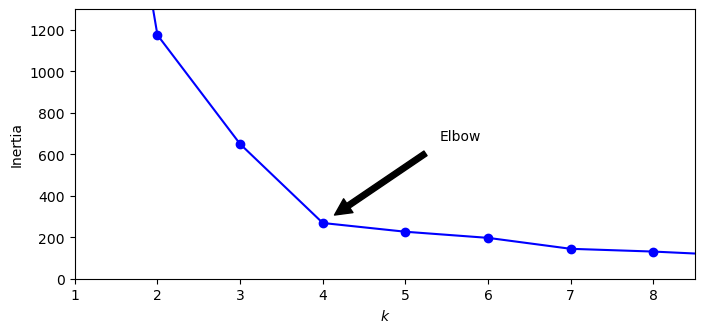

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize = (8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate('Elbow',
             xy = (4, inertias[3]),
             xytext = (0.55, 0.55),
             textcoords = 'figure fraction',
             arrowprops = dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

As you can see, the inertia drops very quickly as we increase *k* up to 4, but then it decreases much more slowly as we keep increasing *k*. This curve has roughly the shape of an arm, & there is an "elbow" at $k = 4$ so if we did not know better, it would be a good choice: any lower value would be dramatic, while any higher value would not help much, & we might just be splitting perfectly good clusters in half for no good reason. 

This technique for choosing the best value for the number of clusters is rather coarse. A more precise approach (but also more computationally expensive) is to use the *silhouette score*, which is the mean *silhouette coefficient* over all the instances. An instance's silhouette coefficient is equal to *(b - a)/max(a, b)* where *a* is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), & *b* is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimises *b*, excluding the instance's own cluster). The silhouette coefficient can vary between -1 & +1: a coefficient close to +1 means that the instance is will inside its own cluster & far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, & finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster. To compute the silhouette score, you can use the scikit-learn's `silhouette_score()` function, giving it all the instances in the dataset, & the labels they were assigned.

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6522147691564292

Let's compare the silhouette scores for different numbers of clusters:

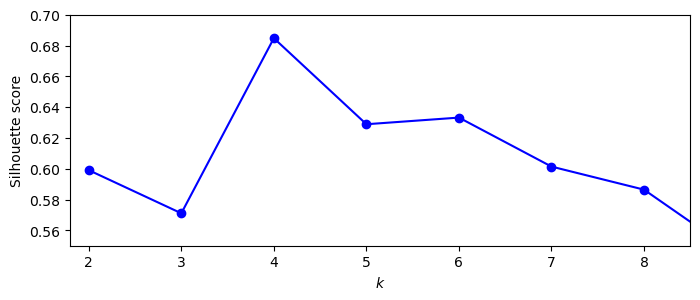

In [13]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize = (8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

As you can see, this visualisation is much richer than the previous one: in particular, although it confirms that $k = 4$ is a very good choice, it also underlines the fact that $k = 5$ is quite good as well, & much better than $k = 6$ or $7$. This was not visible when comparing inertias.

An even more informative visualisation is obtained when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to & by the value of the coefficient. This is called a *silhouette diagram*.

<img src = "Images/Silhouette Diagram.png" width = "800" style = "margin:auto"/>

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient that this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then cluster is rather bad since this means its instances are much too close to other clusters. We can see that when $k = 3$ & when $k = 6$, we get bad clusters. But when $k = 4$ or $k = 5$, the clusters look pretty good -- most instances extend beyond the dashed line, to the right & closer to 1.0. When $k = 4$, the cluster at index 1 (the third from the top), is rather big, while when $k = 5$, all clusters have similar sizes, so even though the overall silhouette score from $k = 4$ is slightly greater than for $k = 5$, it seems like a good idea to use $k = 5$ to get clusters of similar sizes.

## Limits of K-Means

Despite its many merits, most notably being fast & scalable, K-means is not perfect. As we saw, it is necessary to run the algorithm several times to avoid sub-optimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, K-means does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes. For example, the below figure show how K-means clusters a dataset contraining three ellipsoidal clusters of different dimensions, densities & orientations.

<img src = "Images/K-Means Drawbacks.png" width = "750" style = "margin:auto"/>

As you can see, neither of these solutions are any good. The solution on the left is better, but it still chops off 25% of the middle cluster & assigns it to the cluster on the right. The solution on the right is just terrible, even though its inertia is lower. So depending on the data, different clustering algorithms may perform better. For example, on these types of elliptical clusters, Gaussian mixture models work great.

Now let's look at a few ways we can benefit from clustering. We will use K-means, but feel free to experiment with other clustering algorithms.

## Using Clustering for Image Segmentation

*Image segmentation* is the task of partitioning an image into multiple segments. In *semantic segmentation*, all pixels that are part of the same object type get assigned to the same segment. For example, in a self-driving car's vision system, all pixels that are part of a pedestrians's image might be assigned to the "pedestrian" segment (there would just be one segment containing all the pedestrians). In *instance segmentation*, all pixels that are part of the same individual object are assigned to the same segment. In this case, there would be a different segment for each pedestrian. The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks. Here, we are going to do something much simpler: *colour segmentation*. We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient, for example if you want to analyse satellite images to measure how much total forest area there is in a region, colour segmentation may be just fine.

First, let's load an image using matplotlib's `imread()` function.

In [14]:
from matplotlib.image import imread

image = imread("Images/ladybug.png")
image.shape

(533, 800, 3)

The image is represented as a 3D array: the first dimension's size is the height, the second is the width, & the third is the number of colour channels, in this case red, green & blue (RGB). In other words, for each pixel there is 3D vector containing the intensities of red, green & blue, each between 0.0 & 1.0 (or between 0 & 255 if you use `imageio.imread()`). Some images may have less channels, such as gray-scale images (one channel), or more channels, such as images with an additional *alpha channel* for transparency, or satellite images which often contain channels for many light frequencies (e.g., infrared). The following code reshapes the array to get a long list of RGB colours, then its clusters these colours using K-means. For example, it may identify a colour cluster for all shades of green. Next, for each colour (e.g., dark green), it looks for the mean colour of the pixel's colour cluster. For example, all shades of green may be replaced with the same light green colour (assuming the mean colour of the green cluster is light green). Finally it reshapes this long list of colours to get the same shape as the original image. & we're done!

In [15]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

This outputs the image shown in the upper right of the below figure. You can experiment with various numbers of clusters, as shown in the figure. When you use less than 8 clusters, notice that the ladybug's flashy red colour fails to get a cluster of its own: it gets merged with colours from the environment. This is due to the fact that the ladybug is quite small, much smaller than the rest of the image, so even though its colour is flashy, K-means fails to dedicate a cluster to it: as mentioned earlier, K-means prefers clusters of similar sizes.

<img src = "Images/Image Segmentation with K-Means.png" width = "750" style = "margin:auto"/>

That wasn't too hard, was it? Now let's look at another application of clustering: preprocessing.

## Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm. For example, let's tackle the *digits* dataset which is a simple MNIST-like dataset containing 1797 grayscale 8x8 images representing digits 0 to 9. First, let's load the dataset.

In [16]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

Now, let's split it into a training set & a test set:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

Next, let's fit a logistic regression model:

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000, random_state = 32)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=32)

Let's evaluate its accuracy on the test set:

In [19]:
log_reg.score(X_test, y_test)

0.9511111111111111

Okay, that's our baseline: 98% accuracy. Let's see if we can do better by using K-means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters & replace the images with their distances to these 50 clusters, then apply a logistic regression model.

In [20]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("kmeans", KMeans(n_clusters = 50)),
                     ("log_reg", LogisticRegression(max_iter = 1000))])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=1000))])

Now let's evaluate this classification pipeline:

In [21]:
pipeline.score(X_test, y_test)

0.9711111111111111

We chose the number of clusters *k* arbitrarily, but we can surely do better. Since K-means is just a preprocessing step in a classification pipeline, finding a good value for *k* is much simpler than ealier: there's no need to perform silhouette analysis or minimise the inertia, the best value of *k* is simply the one that results in the best classification performance during cross-validation. Let's use `GridSearchCV` to find the optimal number of clusters.

In [22]:
from sklearn.model_selection import GridSearchCV

# Takes too long
#param_search_space = dict(kmeans__n_clusters = range(2, 100))
#grid_search = GridSearchCV(pipeline, param_search_space, cv = 3, verbose = 2)
#grid_search.fit(X_train, y_train)

Let's look at the best value for *k*, & the performance of the resulting pipeline:

In [23]:
#grid_search.best_params_

In [24]:
#grid_search.score(X_test, y_test)

With an optimal number of clusters, we should get a small accuracy boost.

## Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances & very few labeled instances. Let's train a logistic regression model on a sample of 50 labeled instances from the digits dataset:

In [25]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

What is the performance of this model on the test set?

In [26]:
log_reg.score(X_test, y_test)

0.84

The accuracy is just 84%; it should come as no surprise that this is much lower than earlier, when we trained the model on the full training set. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster, let's find the image closest to the centroid. We will call these images the representative images:

In [29]:
k = 50
kmeans = KMeans(n_clusters = k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digits_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digits_idx]

We can plot these 50 representative digits.

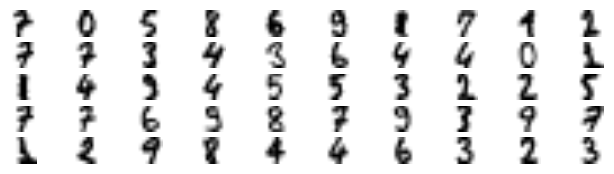

In [31]:
plt.figure(figsize = (8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap = "binary", interpolation = "bilinear")
    plt.axis('off')
plt.show()

Now let's look at each digit & manually label them.

In [32]:
y_representative_digits = np.array([7, 0, 5, 8, 6, 9, 8, 7, 1, 2,
                                    7, 7, 3, 4, 3, 6, 4, 4, 0, 1, 
                                    1, 4, 9, 4, 5, 5, 3, 2, 2, 5,
                                    7, 7, 6, 9, 8, 7, 9, 3, 9, 7,
                                    1, 2, 9, 8, 4, 4, 6, 3, 2, 3])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better.

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8844444444444445

It has improved, even though we are still only training the model on 50 instances. Since it is often costly & painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances.

But perhaps we can go one step further: waht if we propagated the labels to all the other instances in the same cluster? This is called *label propagation*.

In [37]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

Now let's train the model again & look at its performance:

In [39]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8844444444444445

Nothing. The problem is that we propagated each representative's label to all instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled. Let's see what happens if we only propagate the labels to the 20% of the instances that are closest to the centroids:

In [41]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

Now let's train the model again on this partially propagated dataset:

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9044444444444445

Better! With just 50 labeled instances, we got 90.4% performance, which is closer to the performance of the logistic regression on the fully labeled digits dataset (which was 95.1%). This is because the propagated labels are actually pretty good, their accuracy is high.

In [43]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9656357388316151

Before we move on to gaussian mixture models, let's take a look at DBSCAN, another popular clustering algorithm that illustrates a very different approach based on local density estimation. This approach allows the algorithm to identify clusters of arbitrary shapes.

## DBSCAN

This algorithm defines clusters as continuous regions of high density. It is actually quite simple.

* For each instance, the algorithm counts how many instances are located within a small distance $\varepsilon$ (epsilon) from it. This region is called the instance's $\varepsilon$-*neighbourhood*.
* If an instance has at least `min_samples` instances in its $\varepsilon$-neighbourhood (including itself), then it is considered a *core instance*. In other words, core instances are those that all located in dense regions.
* All instances in the neighbourhood of a core instance belong to the same cluster. This may include other core instances, therefore a long sequence of neighbouring core instances forms a single cluster.
* Any instance that is not a core instance & does not have on in its neighbourhood is considered an anomaly.

This algorithm works well if all the clusters are dense enough, & they are well separated by low-density regions. The `DBSCAN` class in scikit-learn is as simple to use as you might expect. Let's test it on the moons dataset.

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.05)

The labels of all the instances are now available in the `labels_` instance variable:

In [45]:
dbscan.labels_

array([ 5,  0, -1,  1,  2,  3,  3,  0,  4,  2,  5,  5,  4,  1,  4,  4,  0,
        4,  0,  2,  2,  4,  0,  2,  6,  7,  5,  0,  7,  2,  4,  2,  4,  6,
        8,  4,  2,  0, -1,  2,  2,  0,  1,  4,  0,  2,  1,  2,  6,  7,  0,
        0,  2,  0,  5,  2,  6,  2,  4,  2, -1,  4,  4,  2, -1,  4,  0,  2,
        5,  5,  2,  2,  2,  2,  5,  6,  2,  6,  2,  2,  5,  0,  0,  5,  4,
        2,  2,  0,  5,  6,  2,  1,  4, -1,  7,  2,  2,  2,  0,  5,  0, -1,
        4,  6,  1,  5,  4,  5,  4,  5,  2,  2,  4,  2,  2,  2,  4,  2,  2,
        2,  2,  2, -1,  0,  5,  6, -1,  2,  2,  5,  4,  5,  2,  0,  6,  0,
        2,  2,  1,  2,  5,  0, -1,  4,  0,  2,  5,  1,  1,  2,  2,  0,  4,
        2,  2, -1,  4,  7,  1,  0,  0,  0,  5,  2,  3,  6,  0,  2,  4,  4,
        4,  5,  6,  2,  1,  2,  2,  0,  4,  0,  0,  4,  4,  2,  6,  5,  0,
        2,  0, -1,  2,  2,  0,  2,  0,  2,  2,  2,  4,  8,  6,  2,  2,  6,
        4,  0,  2,  6,  2,  7,  4,  0,  0,  0, -1,  2,  0,  2,  4,  5,  8,
        8,  8,  2,  5,  2

Notice that some instances have a cluster index equal to -1: this means that they are considered as anomalies by the algorithm. The indices of the core instances are available in the `core_sample_indices_` instance variable, & the core instances themselves are available in the `components_` instance variable:

In [47]:
len(dbscan.core_sample_indices_)

798

In [48]:
dbscan.core_sample_indices_

array([  1,   3,   4,   6,   7,   8,   9,  10,  11,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  37,  39,  40,  41,  42,  43,  45,  46,
        47,  48,  49,  50,  51,  53,  54,  55,  56,  57,  58,  59,  62,
        63,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  94,  95,  96,  97,  99, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 121, 124, 125,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 143, 144, 145, 147, 149, 151, 153, 154, 156, 157, 158, 160,
       162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 190,
       191, 192, 193, 194, 195, 196, 199, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 215, 216, 217, 218, 219, 222, 22

In [49]:
dbscan.components_

array([[-1.02226484,  0.02162784],
       [ 1.90158828,  0.0723769 ],
       [-0.02156031,  0.34951073],
       ...,
       [ 1.84153923,  0.02843818],
       [ 0.95326515, -0.52572287],
       [ 2.02247512,  0.40631142]])

This clustering is represented in the left plot. As you can see, it identified quite a lot of anomalies, plus 7 different clusters. How disappointing! Fortunately, if we widen each instance's neighbourhood by increasing `eps` to 0.2, we get the clustering on the right, which looks perfect. Let's continue with this model.

<img src = "Images/DBSCAN Clustering with Different Neighbourhood Radii.png" width = "700" style = "margin:auto"/>

Somewhat surprisingly, the DBSCAN class does not have a `predict()` method, although it has a `fit_predict()` method. In other words, it cannot predict which cluster a new instance belongs to. The rationale for this decision is that several classification algorithms could make sense here, & it is easy enough to train one, for example a `KNeighborsClassifier`:

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now, given a few new instances, we can predict which cluster they most likely belong to, & even estimate a probability for each cluster. Note that we only trained them on the core instances, but we could also have chosen to train them on all the instances, or all but the anomalies: this choice depends on the final task.

In [53]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 2, 4, 1], dtype=int64)

In [54]:
knn.predict_proba(X_new)

array([[0.86, 0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.38, 0.04, 0.58, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.56, 0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.  ]])

The decision boundary is represented here.

<img src = "Images/DBSCAN Decision Boundary.png" width = "500" style = "margin:auto"/>

Notice that since there is no anomaly in the KNN's training set, the classifier always chooses a cluster, even when that cluster is far away. However, it is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies. To do this, we can use the `kneighbors()` method of the `KNeighborsClassifier`: given a set of instances, it returns the distances & the indices of the *k* nearest neighbours in the training set (two matrices, each with *k* columns):

In [55]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors = 1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  2,  3, -1], dtype=int64)

In short, DBSCAN is a very simple, yet powerful algorithm, capable of identifying any number of clusters, of any shape, it is robust to outliers, & it has just two hyperparameters (`eps` & `min_samples`). However, if the density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly. Moreover, its computational complexity is roughly $O(m\ log\ m)$, making it pretty close to linear with regards to the number of instances. However, scikit-learn's implementation can require up to $O(m^2)$ memory if `eps` is large.

## Other Clustering Algorithms

Scikit-learn implements several more clustering algorithms that you should take a look at. We cannot cover them all in detail here, but here is a brief overview:

* *Agglomerative clustering*: a hierarchy of clusters is built from the bottom up. Think of many tiny bubbles floating on water & gradually attaching to each other until there's just one big group of bubbles. Similarly, at each iteration agglomerative clustering connectes the nearest pair of clusters (starting with individual instances). If you draw a tree with a branch for every pair of clusters that merged, you get a binary tree of clusters, where the leaves are the individual instances. This approach scales very well to large numbers of instances or clusters, it can capture clusters of various shapes, it produces a flexible & informative cluster tree instead of forcing you to choose a particular cluster scale, & it can be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity matrix. This is a spare *m* by *m* matrix that indicates which pairs of instances are neighbours (e.g., returned by `sklearn.neighbors.kneighbors_graph()`). Without a connectivity matrix, the algorithm does not scale well to large datasets.
* *Birch*: this algorithm was designed specifically for very large datasets, & it can be faster than batch K-means, with similar results, as long as the number of featuresis not too large (< 20). It builds a tree structure during training containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree: this allows it to use limited memory, while handling huge datasets.
* *Mean-shift*: this algorithm starts by placing a circle centered on each instance, then for each circle it computes the mean of all the instances located within it, & it shifts the circle so that it is centered on the mean. Next, it iterates this mean-shift step until all the circles stop moving (i.e., until each of them is centered on the mean of the instances it contains). This algorithm shifts the circles in the direction of higher density, untill each of them has found a local density maximum. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster. This has some of the same features as DBSCAN, in particular it can find any number of clusters of any shape, it has just one hyperparameter (the radius of the circles, called the bandwidth) & it relies on local density estimation. However, it tends to chop clusters into pirces when they have internal density variations. Unfortunately, its computational complexity is $O(m^2)$, so it is not suited for large datasets.
* *Affinity propagation*: this algorithm uses a voting system, where instances vote for similar instances to be their representatives, & once the algorithm converges, each representative & its voters form a cluster. This algorithm can detect any number of clusters of different sizes. Unfortunately, this algorithm has a computational complexity of $O(m^2)$, so it is not suited for large datasets.
* *Spectral clustering*: this algorithm takes a similarity matrix between the instances & creates a low-dimensional embedding from it (i.e., it reduces it dimensionality), then it uses another clustering algorithm in this low-dimensional space (scikit-learn's implementation uses K-means). Spectral clustering can capture complex cluster structures, & it can also be used to cut graphs (e.g., to identify clusters of friends on a social network), however it does not scale well to large number of instances, & it does not behave well when the clusters have very different sizes.

Now let's dive into Gaussian mixture models, which can be used for density estimation, clustering & anomaly detection.

---

# Gaussian Mixtures

A *gaussian mixture model* (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several gaussian distributions whose parameters are unknown. All the instances generated from a single gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, & orientation. When you observe an instance, you know it was generated from one of the gaussian distributions, but you are not told which one, & you do not know what the parameters of these distributions are.

There are several GMM variants. In the simplest variant, implemented in the `GaussianMixture` class, you must know in advance the number *k* of gaussian distributions. The dataset $X$ is assumed to have been generated through the following probabilistic process:

* For each instance, a cluster is picked randomly from among *k* clusters. The probability of choosing the $j^{th}$ cluster is defined by the cluster's weight, $\phi^{(j)}$. The index of the cluster chosen for the $i^{th}$ instance is noted $z^{(i)}$.
* If $z^{(i)} = j$, meaning the $i^{th}$ instance has been assigned to the $j^{th}$ cluster, the location $x^{(i)}$ of this instance is sampled randomly from the gaussian distribution with mean $\mu^{(j)}$ & covariance matrix $\sum^{(j)}$. This is noted $x^{(i)} \sim \cal{N}(\mu^{(j)}, \sum^{(j)})$.

This generative process can be represented as a graphical model. This figure represents the structure of the conditional dependencies between random variables.

<img src = "Images/Gaussian Mixtures.png" width = "500" style = "margin:auto"/>

Here is how to interpret the figure:

* The circles represent random variables.
* The squares represente fixed values (i.e., parameters of the model).
* The large rectangles are called *plates*. They indicate that their content is repeated several times.
* The number at the bottom right of each plate indicates how many times its content is repeated. So, there are *m* random variables $z^{(i)}$ (from $z^{(1)}$ to $z^{(m)}$) & *m* random variables $x^{(i)}$. There are also *k* means $\mu^{(j)}$& *k* covariance matrices $\sum^{(j)}$. Lastly, there is just one weight vector $\phi$ (containing all the weights $\phi^{(1)}$ to $\phi^{(k)}$).
* Each variable $z^{(i)}$ is drawn from the *categorical distribution* with weights $\phi$. Each variable $x^{(i)}$ is drawn from the normal distribution, with the mean & covariance matrix defined by its cluster $z^{(i)}$.
* The solid arrows represent conditional dependencies. For example, the probability distribution for each random variable $z^{(i)}$ depends on the weight vector $\phi$. Note that when an arrow crosses a plate boundary, it means that it applies to all the repetitions of that plate. For example, the weight vector $\phi$ conditions the probability distributions of all the random variables $x^{(1)}$ to $x^{(m)}$.
* The squiggly arrow from $z^{(i)}$ to $x^{(i)}$ represents a switch: depending on the value of $z^{(i)}$, the instance $x^{(i)}$ will be sampled from a different gaussian distribution. For example, if $z^{(i)} = j$, then $x^{(i)} \sim \cal{N}(\mu^{(j)}, \sum^{(j)})$.
* Shaded nodes indicate that the value is known. So, in this case, only the random variables $x^{(i)}$ have known values: they are called *observed variables*. The unknown random variables $z^{(i)}$ are called *latent variables*.

So, what can you do with such a model? Well, given the dataset $X$, you typically want to start by estimating the weights $\phi$ & all the distribution parameters $\mu^{(1)}$ to $\mu^{(k)}$ & $\sum^{(1)}$ to $\sum^{(k)}$. Scikit-learn's `GaussianMixture` class makes this super easy:

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

Let's look at the parameters that the algorithm estimated:

In [ ]:
gm.weights_

gm.means_

In [ ]:
gm.covariances_

Great, it worked! Indeed, the weights that were used to generate the data were 0.2, 0.4, & 0.4; & similarly, the means & covariance matrices were very close to those found by the algorithm. But how? This class relies on the *Expectation-Maximization* (EM) algorithm, which has many similarities with the K-menas algorithm: it also initialises the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the *expectation step*) & then updating the cluster (this is called the *maximisation step*). Sounds familiar, right? In the context of clustering, you can think of EM as a generalisation of K-means that not only finds the cluster centers ($\mu^{(1)}$ to $\mu^{(k)}$), but also their size, shape, & orientation ($\sum^{(1)}$ to $\sum^{(k)}$), as well as their relative weights ($\phi^{(1)}$ to $\phi^{(k)}$). Unlike K-means, though, EM uses soft cluster assignments, not hard assignments. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using *all* the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the *responsibilities* of the clusters for the instances.

During the maximization step, each cluster's update will mostly be impacted by the instances it is most responsible for.

You can check whether or not the algorithm converged & how many iterations it took:

In [ ]:
gm.converged_

In [ ]:
gm.n_iter_

Now that you have an estimate of the location, size, shape, orientation, & relative weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering). Just use the `predict()` method for hard clustering, or `predict_proba()` method for soft clustering:

In [ ]:
gm.predict(X)

In [ ]:
gm.predict_proba(X)

A gaussian mixture model is a *generative model*, meaning you can sample new instances from it (note that they are ordered by cluster index):

In [ ]:
X_new, y_new = gm.sample(6)
X_new

In [ ]:
y_new

It is also possible to estimate the density of the model at any given location. This is achieved using the `score_samples()` method: for each instance it is given, this method estimates the log of the *probability density function* (PDF) at that location. The freater the score, the higher the density:

In [ ]:
gm.score_samples(X)

If you compute the exponential of these scores, you get the value of the PDF at the location of the given instances. These are not probabilities, but probabilities *densities*: they can take on any positive value, not just a value between 0 & 1. To estimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region (if you do so over the entire space of possible instance locations, the result will be 1).

The figure shows the cluster means, the decision boundaries (dashed lines), & the density contours of this model.

<img src = "Images/Cluster Means Decision Boundaries Density Contours.png" width = "500" style = "margin:auto"/>

Nice! The algorithm clearly found an excellent solution. Of course, we made its task by generating the data using a set of 2D gaussian distributions (unfortunately, real-life data is not always so gaussian & low-dimensional). We also gave the algorithm the correct number of clusters. When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn. One way to do this is to limit the range of shapes & orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices. To do this, set the `covariance_type` hyperparameter to one of the following values:

* `"spherical"`: All clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: Clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).
* `"tied"`: All clusters must have the same ellipsoidal shape, size, & orientation (i.e., all clusters share the same covariance matrix).

By default, `covariance_type` is equal to `"full"`, which means that each cluster can take on any shape, size, & orientation (it has its own unconstrained covaraince matrix). This figure plotsthe solutions found by the EM algorithm when `covariance_type` is set to `"tied"` or `"spherical"`.

<img src = "Images/Tied Clusters vs Spherical Clusters.png" width = "600" style = "margin:auto"/>

Gaussian mixture models can also be used for anomaly detection. Let's see how.

## Anomaly Detection Using Gaussian Mixtures

*Anomaly detection* (also called *outlier detection*) is the task of detecting instances that deviate strongly from the norm. These instances are called *anomalies*, or *outliers*, while the normal instances are called *inliers*. Anomaly detection is useful in a wide variety of applications, such as fraud detection, detecting defective products in manufacturing, or removing outliers from a dataset before training another model (which can significantly improve the performance of the resulting model).

Using a gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well known. Say it is equal to 4%. You then set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density. If you notice that you get too many false positives (i.e., perfectly good products that are flagged as defective), you can lower the threshold. Conversely, if you have too many false negatives (i.e., defective products that the system does not flag as defective), you can increase the threshold. This is the usual precision/recall trade-off. Here is how you would identify the outliers using the fourth percentile lowest density as the threshold (i.e., approximately 4% of the instances will be flagged as anomalies):

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

We can represent these anomalies as stars.

<img src = "Images/Anomaly Detection with Gaussian Mixture Models.png" width = "500" style = "margin:auto"/>

A closely related task is *novelty detection*: it differs from anomaly detection in that the algorithm is assumed to be trained on a "clean" dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often used to clean up a dataset.

Just like K-means, the `GaussianMixture` algorithm requires you to specify the number of clusters. So, how can you find it?

## Selecting the Number of Clusters

With K-means, you could use the inertia or the silhouette score to select the appropriate number of clusters. But with gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, you can try to find the model that minimises a *theoretical information criterion* such as the *Bayesian information criterion* (BIC) or the *Akaiki information criterion* (AIC).

$$BIC = log(m)p - 2log(\hat{L})$$
$$AIC = 2p - 2log(\hat{L})$$

In these equations:

* *m* is the number of instances, as always.
* *p* is the number of parameters learned by the model.
* $\hat{L}$ is the maximised value of the *likelihood function* of the model. 

Both the BIC & the AIC penalise models that have more parameters to learn (e.g., more clusters) & reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is especially true for larger datasets).

To compute the BIC & AIC, call the `bic()` & `aic()` methods:

gm.bic(X)

In [ ]:
gm.aic(X)

We can show how AIC & BIC behave for different numbers of clusters *k*.

<img src = "Images/AIC & BIC vs K.png" width = "500" style = "margin:auto"/>

## Likelihood Function

The terms "probability" & "likelihood" are often used interchangeably in the English language, but they have very different meanings in statistics. Given a statistical model with some parameters $\theta$, the word "probability" is used to describe how plausible a future outcome $x$ is (knowing the parameter values $\theta$), while the word "likelihood" is used to describe how plausible a particular set of parameter values $\theta$ are, after the outcome $x$ is known.

<img src = "Images/Likelihood Function.png" width = "500" style = "margin:auto"/>

Consider a 1D mixture model of two gaussian distributions centered at -4 & +1. For simplicity, this toy model has a single parameter $\theta$ that controls the standard deviations of both distributions. The top-left contour plot shows the entire model $f(x; \theta)$ as a function of both $x$ & $\theta$. To estimate the probability distribution of a future outcome $x$, you need to set the model parameter $\theta$. For example, if you set $\theta$ to 1.3 (the horizontal line), you get the probability density function $f(x; \theta = 1.3)$ shown in the lower-left plot. Say you want to estimate the probability that $x$ will fall between -2 & +2. You must calculate the integral of the PDF on this range (i.e., the surface of the shaded region). But what if you don't know $\theta$, & instead if you have observed a single instance $x = 2.5$ (the vertical line in the upper-left plot)? In this case, you get the likelihood function $\cal{L}(\theta|x = 2.5) = f(x = 2.5; \theta)$, represented in the upper-right plot.

In short, the PDF is a function of $x$ (with $\theta$ fixed), while the likelihood function is a function of $\theta$ (with $x$ fixed). It is important to understand that the likelihood function is *not* a probability distribution: if you integrate a probability distribution over all possible values of $x$, you always get 1; but if you integrate the likelihood function over all possible values of $\theta$, the result can be any positive value.

Given a dataset $X$, a common task is to try to estimate the most likely values for the model parameters. To do this, you must find the values that maximise the likelihood function, given $X$. In this example, if you have observed a single instance $x = 2.5$, the *maximum likelihood estimate* (MLE) of $\theta$ is $\hat{\theta} = 1.5$. If a prior probability distribution $g$ over $\theta$ exists, it is possible to take it into account by maximizing $\cal{L}(\theta|x)g(\theta)$ rather than just maximizing $\cal{L}(\theta | x)$. This is called *maximum a-posteriori* (MAP) estimation. Since MAP constrains the parameter values, you can think of it as a regularised version of MLE.

Notice that maximising the likelihood function is equivalent to maximising its logarithm (represented in the lower-righthand plot). Indeed the logarithm is a strictly increasing function, so if $\theta$ maximises the log likelihod, it also maximises the likelihood. It turns out that it is generally easier to maximise the log likelihood. For example, if you observed several independent instance $x^{(i)}$ to $x^{(m)}$, you would need to find the value of $\theta$ that maximises the product of the individual likelihood functions. But it is equivalent, & much simpler, to maximise the sum (not the product) of the log likelihood functions, thanks to the magic of the logarithm which converts products into sums: $log(ab) = log(a) + log(b)$.

Once you have estimate $\hat{\theta}$, the value of $\theta$ that maximises the likelihood function, then you are ready to compute $\hat{L} = \cal{L} (\hat{\theta}, X)$, which is the value used to compute the AIC & BIC; you can think of it as a measure of how well the model fits the data.

## Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, you can use the `BayesianGaussianMixture` class, which is capable of giving weights equal (or close) to zero to unnecessary clusters. Set the number of clusters `n_components` to a value that you have a good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), & the algorithm will eliminate the unnecessary clusters automatically. For example, let's set the number of cluster to 10 & see what happens:

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components = 10, n_init = 10)
bgm.fit(X)
np.round(bgm.weights_, 2)

Perfect: the algorithm automatically detected that only three clusters are needed, & the resulting clusters are almost identifcal to the ones from before: 0.4, 0.2, 0.4.

In this model, the cluster parameters (including the weights, means, & covariance matrices) are not treated as fixed model parameters anymore,but as latent random variables, like the cluster assignments. So $z$ now includes both the cluster parameters & the cluster assignments.

The beta distribution is commonly used to model random variables whose values lie within a fixed range. In this case, the range is from 0 to 1. The stick-breaking process (SBP) is best explained through an example: suppose $\phi$ = [0.3, 0.6, 0.5, ...], then 30% of the instances will be assigned to cluster 0, then 60% of the remaining instances will be assigned to cluster 1, then 50% of the remaining instances will be assigned to cluster 2, & so on. This process is a good model for datasets where the new instances are more likely to join large clusters than small clusters (e.g., people are more likely to move to larger cities). If the concentration $\alpha$ is high, then $\phi$ values will likely be close to 0, & the SBP generate many clusters. Conversely, if the concentration is low, then $\phi$ values will likely be close to 1, & there will be few clusters. Finally, the Wishard distribution is used to sample covariance matrices: the parameters $d$ & $V$ control the distribution of cluster shapes.

<img src = "Images/Bayesian Gaussian Mixture Model.png" width = "600" style = "margin:auto"/>

Prior knowledge about the latent variables $z$ can be encoded in a probability distribution $p(z)$ called the *prior*. For example, we have a prior belief that the clusters are likely to be few (low concentration), or conversely, that they are likely to be plentiful (high concentration). This prior belief about the number of clusters can be adjusted using the `weight_concentration_prior` hyperparameter. Setting it to 0.01 or 10,000 gives very different clusterings. The more data we have, however, the less the priors matter. In fact, to plot diagrams with such large differences, you must use very strong priors & little data.

<img src = "Images/Different Priors vs # of Clusters.png" width = "600" style = "margin:auto"/>

Bayes' theorem tells us how to update the probability distribution over the latent variables after we observe some data $X$. It computes the *posterior* distribution $p(z|X)$, which is the conditional probability of $z$ given $X$.

$$p(z|X) = posterior = \frac{likelihood\ x\ prior}{evidence} = \frac{p(X|z)p(z)}{p(X)}$$

Unfortunately, in a gaussian mixture model (& many other problems), the denominator $p(x)$ is intractable, as it requires integrating over all the possible values of $z$., which would require considering all possible combinations of cluster parameters & cluster assignments.

$$p(X) = \int p(X|z)p(z) dz$$

This intractability is one of the central problems in bayesian statistics, & there are several approaches to solving it. One of them is *variational inference*, which picks a family of distributions $q(z, \lambda)$ with its own *variational parameters* $\lambda$ (lambda), then optimises these parameters to make $q(z)$ a good approximation of $p(z|X)$. This is achieved by finding the value of $\lambda$ that minimises the KL divergence from $q(z)$ to $p(z|X)$, noted $D_{KL}(q||p)$. The KL divergence equation is shown, & it can be rewritten as the log of the evidence ($log\ p(X)$) minus the *evidence lower bound* (ELBO). Since the log of the evidence does not depend on $q$, it is a constant term, so minimising the KL divergence just requires maximising the ELBO.

$$\begin{split}
D_{KL}(q||p) = \mathbb{E}_q [log \frac{q(z)}{p(z|X)}] \\
= \mathbb{E}_q [log\ q(z) - log\ p(z|X)] \\
= \mathbb{E}_q [log\ q(z) - log\ \frac{p(z, X)}{p(X)}] \\
= \mathbb{E}_q [log\ q(z) - log\ p(z|X) + log\ p(X)] \\
= \mathbb{E}_q [log\ q(z)] - \mathbb{E}_q [log\ p(z, X)] + \mathbb{E}_q [log\ p(X)] \\
= \mathbb{E}_q [log\ p(X)] - (\mathbb{E}_q [log\ p(z, X)] - \mathbb{E}_q [log\ q(Z)]) \\
= log\ p(X) - ELBO \\
where\ ELBO = \mathbb{E}_q [log\ p(z, X)] - \mathbb{E}_q [log\ q(z)]
\end{split}$$

In practice, there are different techniques to maximise the ELBO. In *mean field variational inference*, it is necessary to pick the family of distributions $q(z; \lambda)$ & the prior $p(z)$ very carefully to ensure that the equiation for the ELBO simplifies to a form that can be computed. Unfortunately, there is no general way to do this. Picking the right family of distributions & the right prior depends on the task & requires some mathmatical skills. For example, the distributions & lower-bound euqations used in scikit-learn's `BayesianGaussianMixture` class are presented in the documentation. From these equations, it is possible to derive update equations for the cluster parameters & assignment variables: these are then used very much like in expectation-maximisation algorithm. In fact, the computational complexity of the `BayesianGaussianMixture` class similar to that of the `GaussianMixture` class (but generally significantly slower). A simpler approach to maximizing the ELBO is called *black box stochastic variational inference (BBSVI): at each iteration, a few samples are drawn from $q$, & they are used to estimate the gradients of the ELBO with regard to the variational parameters $\lambda$, which are then used in a gradient ascent step. This approach makes it possible to use bayesian inference with any kind of model (provided it is differentiable), even deep neural networks; using bayesian inference with deep neural networks is called bayesian deep learning.

Gaussian mixture models work great on clusters with ellipsoidal shapes, but if you try to fit a dataset with different shapes, you may have bad surprises. For example, let's see what happens if we use a bayesian gaussian mixture model to cluster the moons dataset.

<img src = "Images/Bayesian Gaussian Mixture Model.png" width = "600" style = "margin:auto"/>

Oops! The algorithm desperately searched for ellipsoids, so it found eight different clusters instead of two. The density estimation is not too bad, so this model could perhaps be used for anomaly detection, but it failed to identify the two moons. Let's now look at a few clustering algorithms capable of dealing with arbitrarily shaped clusters.

## Other Algorithms for Anomaly & Novelty Detection

Scikit-learn implements other algorithms dedicated to anomaly detection or novelty detection:

* *PCA (& any other dimensionality reduction technique with an `inverse_transform()` method)*
   - If you compare the reconstruction error of a normal instance with the reconstruction error of an anomaly, the latter will usually be much larger. This is a simple & often quite efficient anomaly detection approach.
* *Fast-MCD (minimum covariance determinant)*
   - Implemented by the `EllipticEnvelope` class, this algorithm is useful for outlier detection, in particular to clean up a dataset. It assumes that the normal instances (inliers) are generated from a single gaussian distribution (not a mixture). It also assumes that the dataset is contaminated with outliers that were not generated from this gaussian distribution. When the algorithm estimates the parameters of the gaussian distribution (i.e., the shape of the elliptic envelope around the inliers), it is careful to ignore the instances that are most likely outliers. This technique gives a better estimation of the elliptic envelope & thus makes the algorithm better at identifying the outliers.
* *Isolation Forest*
   - This is an efficient algorithm for outlier detection, especially in high-dimensional datasets. The algorithm builds a random forest in which each decision tree is grown randomly; at each node, it picks a feature randomly, then pickts a random threshold value (between the min & max values) to split the dataset in two. The dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances. Anomalies are usually far from other instances, so on average (across all the decision trees) they tend to get isolated in fewer steps than normal instances.
* *Local Outlier Factor (LOF)*
   - This algorithm is also good for outlier detection. It compares the density of instances around a given instance to the density around its neighbours. An anomaly is often more isolated than its *k* nearest neighbours.
* *One-class SVM*
   - This algorithm is better suited for novelty detection. Recall that a kernelised SVM classifier separates two classes by first (implicitly) mapping all the instances to a high-dimensional space, then separating the two classes using a linear SVM classifier within this high-dimensional space. Since we just have one class of instances, the one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin. In the original space, this will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. There are a few hyperparameters to tweak: the usual ones for the kernelised SVM, plus a margin hyperparameter that corresponds to the probability of a new instance being mistakenly considered as novel when it is in fact normal. It works great, especially with high-dimensional datasets, but like all SVMs, it does not scale to large datasets.